In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#IMPORT NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

%matplotlib inline

# Step 1: Reading and Understanding the Data

In [3]:
#Importing dataset
df= pd.read_csv("day.csv")

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#Checking for Null Values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
##Dropping the unnecessary columns ::instant(just a count),dteday (not a timeseries analysis)
df = df.drop(['instant','dteday'], axis =1)
df.shape

(730, 14)

In [11]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Step 2: Visualising the Data

1) If there is some obvious multicollinearity going on, this is the first place to catch it<br>
2) Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

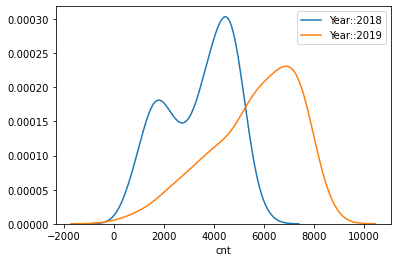

In [12]:
yr = [0, 1]
dict1= {0: "2018", 1:"2019"}
for i in yr:
    subset = df[df['yr']==i]
    str1= "Year::"+ dict1[i]
    sns.distplot(subset['cnt'], hist = False, label= str1)

The above density plots are year wise. Depicting probability on the y axis and cnt on x axis.

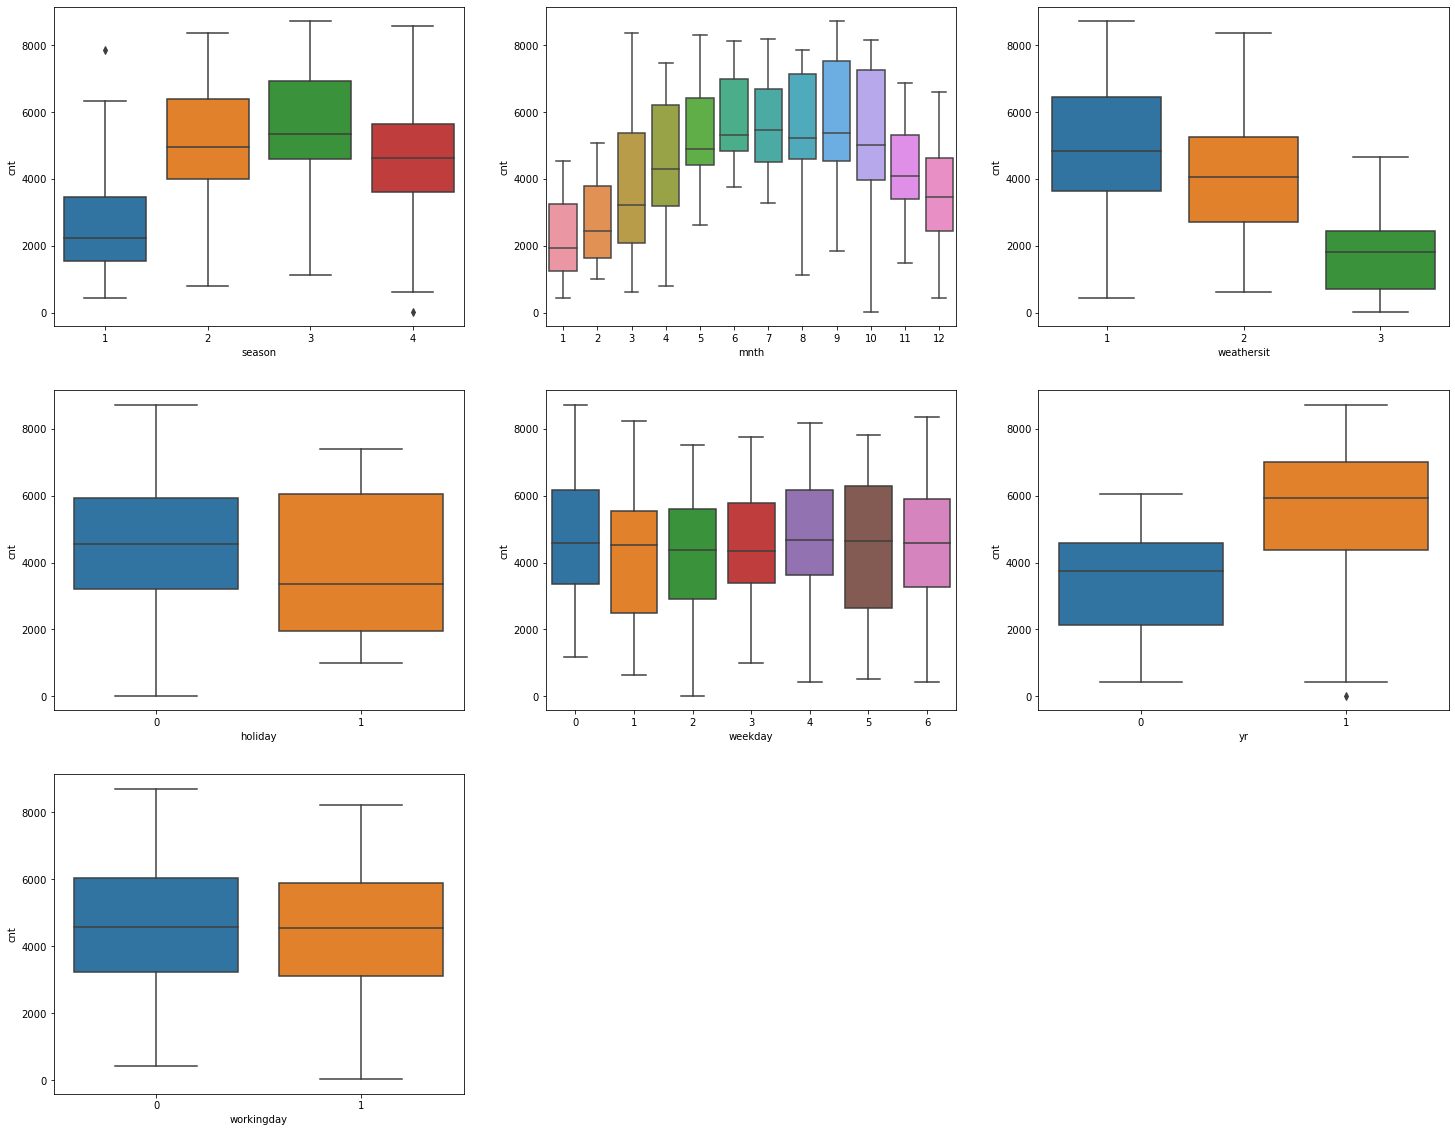

In [13]:
#Visualising categorical Variables to understand data better
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()

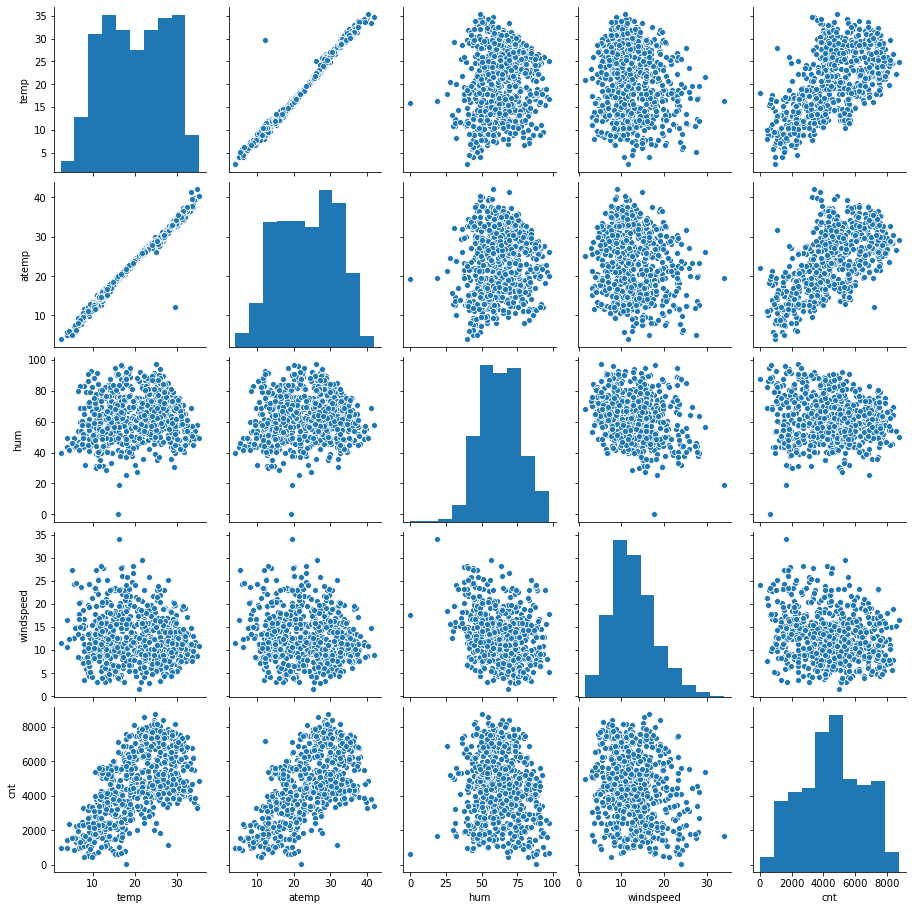

In [14]:
#PAIRPLOTS TO UNDERSTAND NUMERICAL VARIABLES
sns.pairplot(df, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

Analysis from the above pairplot is as follows:-<br>

1)Features temp and atemp seem to have a linear correlation with our target variable cnt<br>
2)Features teamp and atemp also seem to be highly correlated with each other. Therefore one can be dropped.<br>
3)The target variable column i.e cnt column could have a normal distribution<br>
4)hum column do not show any linear relationship with the target column<br>
5)For Workingday variable vs cnt, the data is almost equally distributed<br>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


In [16]:
#Converting dtypes for Registered,Casual,Cnt
df['registered'] = df['registered'].astype("float64")
df['casual'] = df['casual'].astype("float64")
df['cnt'] = df['cnt'].astype("float64")

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
dtypes: float64(7), int64(7)
memory usage: 80.0 KB


## Correlation Matrix

In [18]:
df_numeric = df.select_dtypes(include=["float64"])

In [19]:
cor = df_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


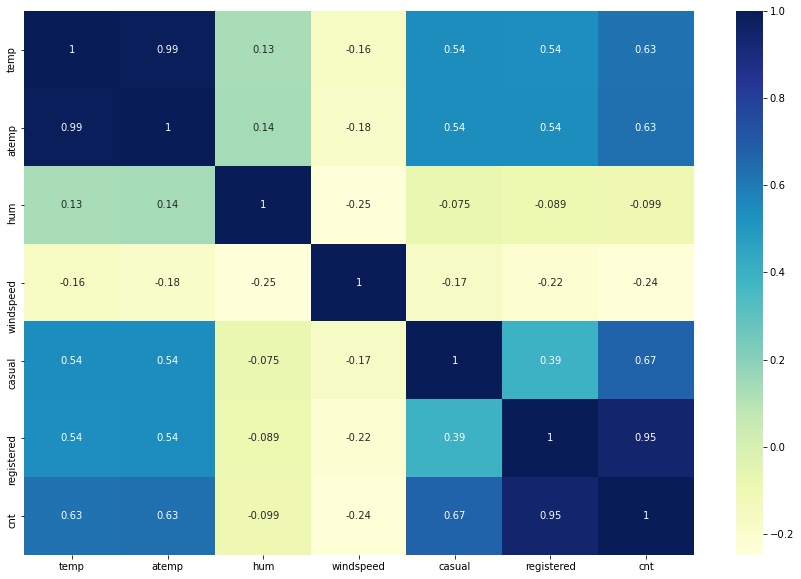

In [20]:
# Let's check the correlation coefficients to see which variables are highly correlated 
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True, cmap="YlGnBu")
plt.show()

We can draw the following insights from the heat map -

	
The correlation between "cnt" and "registered" is very high (0.95)<br>
The correlation between "cnt" and "casual" is appreciably high (0.67)<br>
The correlation between "atemp" and "temp" is very high (0.99)<br>


Therefore, we can drop the "registered", "casual" and "atemp" columns.

In [21]:
df = df.drop(['casual','registered','atemp'], axis =1)
df.shape

(730, 11)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985.0
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801.0
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349.0
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562.0
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600.0


# Step 3: Data Preparation

Now as we have seen, 'season', 'mnth', 'weekday and 'weathersit' are categorical features. But, their data types are all int type. Therefore, the first step here would be to convert them to an object type.

In [23]:
# Mapping the values in season
df['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)

In [24]:
# Mapping the values in weathersit
# encoding weathersit
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

df['weathersit'].replace({1: "clear_weather", 2: "mist_weather", 3:"light_weather", 4:"extreme_weather"},inplace=True)

In [25]:
# Mapping the values in weekday
df['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)

In [26]:
# Mapping the values in mnth
df['mnth'].replace({1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7: "July", 8:"Aug", 9:"Sep", 10:"Oct", 11: "Nov", 12:"Dec"},inplace=True)

In [27]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,mist_weather,14.110847,80.5833,10.749882,985.0
1,spring,0,Jan,0,Tuesday,1,mist_weather,14.902598,69.6087,16.652113,801.0
2,spring,0,Jan,0,Wednesday,1,clear_weather,8.050924,43.7273,16.636703,1349.0
3,spring,0,Jan,0,Thursday,1,clear_weather,8.200000,59.0435,10.739832,1562.0
4,spring,0,Jan,0,Friday,1,clear_weather,9.305237,43.6957,12.522300,1600.0


## Dummy Variables Creation

In [28]:
# Get the dummy variables for the feature and store it in a new variable - 'status'
status = pd.get_dummies(df['season'])
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [29]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df['season'], drop_first = True)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [30]:
# Add the results to the original day dataframe
df = pd.concat([df, status], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Monday,1,mist_weather,14.110847,80.5833,10.749882,985.0,1,0,0
1,spring,0,Jan,0,Tuesday,1,mist_weather,14.902598,69.6087,16.652113,801.0,1,0,0
2,spring,0,Jan,0,Wednesday,1,clear_weather,8.050924,43.7273,16.636703,1349.0,1,0,0
3,spring,0,Jan,0,Thursday,1,clear_weather,8.200000,59.0435,10.739832,1562.0,1,0,0
4,spring,0,Jan,0,Friday,1,clear_weather,9.305237,43.6957,12.522300,1600.0,1,0,0


In [31]:
# Creating dummy variables for weekday and adding results to original dataframe
status = pd.get_dummies(df['weekday'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,spring,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,spring,0,Jan,0,Monday,1,mist_weather,14.110847,80.5833,10.749882,985.0,1,0,0,1,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,mist_weather,14.902598,69.6087,16.652113,801.0,1,0,0,0,0,0,0,1,0
2,spring,0,Jan,0,Wednesday,1,clear_weather,8.050924,43.7273,16.636703,1349.0,1,0,0,0,0,0,0,0,1
3,spring,0,Jan,0,Thursday,1,clear_weather,8.200000,59.0435,10.739832,1562.0,1,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Friday,1,clear_weather,9.305237,43.6957,12.522300,1600.0,1,0,0,0,0,0,0,0,0


In [32]:
# Creating dummy variables for weathersit and adding results to original dataframe
status = pd.get_dummies(df['weathersit'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_weather,mist_weather
0,spring,0,Jan,0,Monday,1,mist_weather,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,mist_weather,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,clear_weather,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,clear_weather,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,clear_weather,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# Creating dummy variables for mnth and adding results to original dataframe
status = pd.get_dummies(df['mnth'], drop_first = True)
df = pd.concat([df, status], axis = 1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Monday,1,mist_weather,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Tuesday,1,mist_weather,14.902598,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Wednesday,1,clear_weather,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Thursday,1,clear_weather,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Friday,1,clear_weather,9.305237,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


In [34]:
#The original column 'season','weekday','weathersit','mnth' is not needed now
#Dropping from original dataframe
df=df.drop('season', axis=1)
df.drop(['weathersit'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)

df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'light_weather', 'mist_weather',
       'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct',
       'Sep'],
      dtype='object')

# Step 4: Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

Here we use MinMaxScaling technique to rescale the values

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing into X and Y sets for the model building

In [39]:
X_train=df_train.drop('cnt',axis=1)
y_train=df_train['cnt']

In [40]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Monday,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

# Step 5: Building a linear model

## RFE

In [42]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [44]:
#checking the variables RFE selected with the help of "rfe.support_" ,"rfe.ranking_". 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 10),
 ('light_weather', True, 1),
 ('mist_weather', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1)]

In [45]:
#we are going to take those features which RFE supports
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'light_weather', 'mist_weather', 'Dec', 'Jan', 'July', 'Nov',
       'Sep'],
      dtype='object')

In [46]:
#checking whic the rfe didn't support
X_train.columns[~rfe.support_]

Index(['workingday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
X_train_rfe.shape

(510, 15)

In [49]:
# Adding a constant variable
#Model-1
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.34e-189
Time:                        23:41:28   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.81
9,mist_weather,2.32
0,yr,2.09
13,Nov,1.83
11,Jan,1.75


'hum' has high VIF , as it is insignificant in comparison to other variables. So it can be dropped

In [51]:
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)
X_train_rfe

,yr,holiday,temp,windspeed,spring,summer,winter,light_weather,mist_weather,Dec,Jan,July,Nov,Sep
653,1,0,0.509887,0.300794,0,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.255342,1,0,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,0.824514,0.355596,0,1,0,0,1,0,0,0,0,0
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.431816,0,0,1,0,1,1,0,0,0,0


In [52]:
# Model-2
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.57e-186
Time:                        23:41:29   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2466      0.032      7.679

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,winter,2.94
4,spring,2.89
5,summer,2.23
0,yr,2.07
12,Nov,1.80
10,Jan,1.66
11,July,1.59
8,mist_weather,1.56


In [54]:
#Dropping 'summer' as it has high p-value
X_train_rfe=X_train_rfe.drop(['summer'],axis=1)
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,winter,light_weather,mist_weather,Dec,Jan,July,Nov,Sep
653,1,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0
576,1,0,0.815169,0.264686,0,0,0,0,0,0,1,0,0
426,1,0,0.442393,0.255342,1,0,0,1,0,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,1,0,0,0,0,0


In [55]:
#Model-3
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.08e-186
Time:                        23:41:29   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2893      0.025     11.427

In [56]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
7,mist_weather,1.53
8,Dec,1.46
10,July,1.36


In [57]:
#Dropping 'Nov' because of -ve coeff
X_train_rfe=X_train_rfe.drop(['Nov'],axis=1)

In [58]:
#Model-4
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.02e-186
Time:                        23:41:29   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2769      0.025     11.074

In [59]:
#Dropping 'Dec' because of -ve coeff
X_train_rfe=X_train_rfe.drop(['Dec'],axis=1)

In [60]:
#Model-5
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm4 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.13e-186
Time:                        23:41:29   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2657      0.025     10.843

In [61]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,spring,2.25
0,yr,2.06
8,Jan,1.60
7,mist_weather,1.53
5,winter,1.40
9,July,1.36
10,Sep,1.20
6,light_weather,1.08


In [62]:
#Dropping 'Jan' because of -ve coeff
X_train_rfe=X_train_rfe.drop(['Jan'],axis=1)

In [63]:
#Model-6
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm5 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.16e-186
Time:                        23:41:29   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.024     10.530

In [64]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
7,mist_weather,1.51
5,winter,1.40
8,July,1.35
9,Sep,1.20
6,light_weather,1.08
1,holiday,1.04


In [65]:
#Dropping 'mist_weather' because of -ve coeff
X_train_rfe=X_train_rfe.drop(['mist_weather'],axis=1)
X_train_rfe.head()

,yr,holiday,temp,windspeed,spring,winter,light_weather,July,Sep
653,1,0,0.509887,0.300794,0,1,0,0,0
576,1,0,0.815169,0.264686,0,0,0,1,0
426,1,0,0.442393,0.255342,1,0,0,0,0
728,1,0,0.245101,0.663106,1,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0


In [66]:
#Model-7
X_train_rfe1 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.33e-171
Time:                        23:41:30   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2042      0.025      8.095

In [67]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.40
3,windspeed,3.98
0,yr,2.06
4,spring,1.61
5,winter,1.37
7,July,1.34
8,Sep,1.20
6,light_weather,1.06
1,holiday,1.04


## Checking various assumptions:

### Normality assumption

In [68]:
y_train_cnt = lm6.predict(X_train_rfe1)


In [69]:
res = y_train - y_train_cnt

Text(0.5, 0, 'Errors')

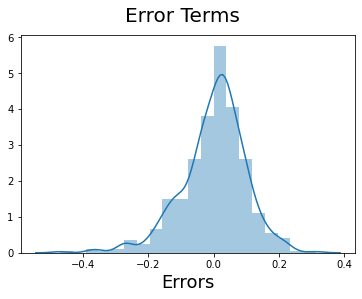

In [70]:
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [71]:
print(X_train_rfe1.shape)
print(res.shape)

(510, 10)
(510,)


### Checking For Constant Variance

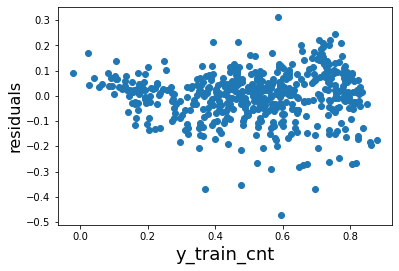

In [72]:
plt.scatter(y_train_cnt,res)
plt.xlabel('y_train_cnt', fontsize = 18)                          # X-label
plt.ylabel('residuals', fontsize = 16) 
plt.show()

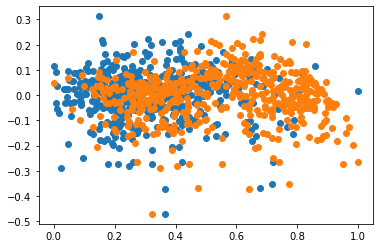

In [73]:
plt.scatter(X_train_rfe1.windspeed,res)
plt.scatter(X_train_rfe1.temp,res)
plt.show()

## Making Predictions

Applying the Scaling on Test Data

In [74]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [75]:
#Creating x and y sets
X_test=df_test.drop('cnt',axis=1)
y_test=df_test['cnt']

In [76]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Monday,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
#dropping const and saving in new dataframe 
X_train_new = X_train_rfe1.drop(['const'], axis=1)

In [78]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [79]:
#Making predictions on the chosen model
y_pred = lm6.predict(X_test_new)

Text(0, 0.5, 'y_pred')

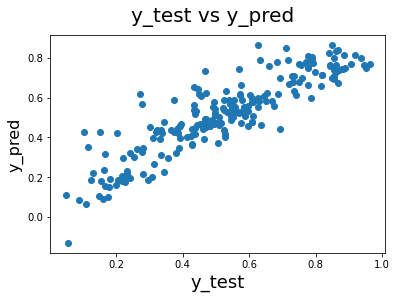

In [80]:
#CHECKING PREDICTED V/s TEST DATA 
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

##### We have a model that seems good enough to predict demand of bikes. <br>The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

In [85]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score

In [86]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.07537255439572951
Mean Squared Error: 0.01003056398622754
Root Mean Squared Error: 0.10015270333958809


In [87]:
r2_score(y_test,y_pred)

0.7888115946045293

### We can see that the equation for best fitted line is:

### cnt = 0.2350 x yr - 0.08 x holiday + 0.475 x temp - 0.132 x windspeed - 0.103 x spring + 0.050 x winter - 0.256 x light_weather - 0.061 x July + 0.0498 x Sep  

temp : coefficient of temp in the equation above is 0.475. It indicates that when there is unit increase in temp, the output cnt is estimated to increase by 0.475 units, keeping all the other attributes constant.<br>
light_weather: coefficient is -0.256. Clear_weather and mist_weather are both less likely to affect the cnt variable. Whereas light_weather conditions, adversely affect the cnt. If its value become true, i.e 1, there will be decline in the value of cnt by 0.2356 units.<br>
yr: coefficient is 0.2350. It indicates that the year 2019 was favoring the target variable cnt. It means in 2019, there is increase in the cnt variable by 0.2350 units in comparison to 2018 year keeping the other attributes intact.
Similarly we can interpret for other<br>
Month Sep has good demand of bikes.